In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('SMSSpamCollection',sep="\t", header=None, names = ['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='label'>

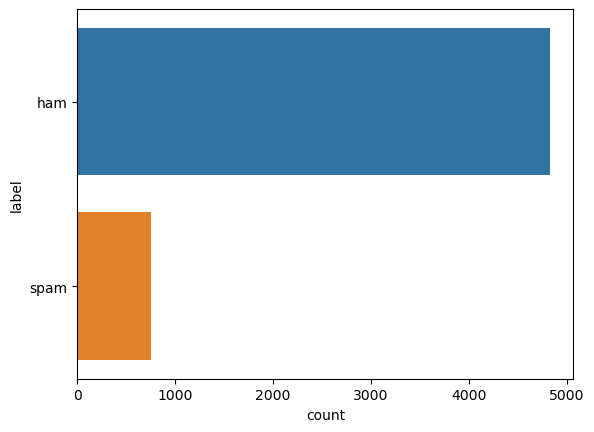

In [4]:
sns.countplot(y=df['label'])

#### Data Preparation

In [5]:
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string

In [6]:
sent = 'Hello friends! How are you? Welcome to Python Programming'

In [7]:
tokens1 = word_tokenize(sent)
tokens1

['Hello',
 'friends',
 '!',
 'How',
 'are',
 'you',
 '?',
 'Welcome',
 'to',
 'Python',
 'Programming']

In [8]:
tokens2 = [x.lower() for x in tokens1 if x not in string.punctuation]
tokens2

['hello',
 'friends',
 'how',
 'are',
 'you',
 'welcome',
 'to',
 'python',
 'programming']

In [9]:
tokens3 = [x for x in tokens2 if x.isalpha() or x.isdigit()]
tokens3

['hello',
 'friends',
 'how',
 'are',
 'you',
 'welcome',
 'to',
 'python',
 'programming']

In [10]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [11]:
wnl = WordNetLemmatizer()

In [12]:
tokens4 = []
tags = pos_tag(tokens3)
for word in tags:
    if word[1].startswith('N'):
        tokens4.append(wnl.lemmatize(word[0], pos='n'))
    if word[1].startswith('V'):
        tokens4.append(wnl.lemmatize(word[0], pos='v'))
    if word[1].startswith('R'):
        tokens4.append(wnl.lemmatize(word[0], pos='r'))
    if word[1].startswith('J'):
        tokens4.append(wnl.lemmatize(word[0], pos='a'))

In [13]:
tokens4

['hello', 'friends', 'be', 'welcome', 'python', 'programming']

In [14]:
def clean_text(text):
    tokens1 = word_tokenize(text)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha() or x.isdigit()]
    tokens3 = [x for x in tokens2 if x not in stopwords.words('english')]
    tokens4 = []
    tags = pos_tag(tokens3)
    for word in tags:
        if word[1].startswith('N'):
            tokens4.append(wnl.lemmatize(word[0], pos='n'))
        if word[1].startswith('V'):
            tokens4.append(wnl.lemmatize(word[0], pos='v'))
        if word[1].startswith('R'):
            tokens4.append(wnl.lemmatize(word[0], pos='r'))
        if word[1].startswith('J'):
            tokens4.append(wnl.lemmatize(word[0], pos='a'))
    
    return tokens4
    
    

In [15]:
clean_text(sent)

['hello', 'friends', 'welcome', 'python', 'programming']

In [16]:
sent2 = "When we visited the ground no one was playing."
clean_text(sent2)

['visit', 'ground', 'playing']

In [17]:
df['text'].apply(lambda x: clean_text(x))

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4                             [nah, think, go, usf, life]
                              ...                        
5567    [time, try, contact, u, pound, prize, claim, e...
5568                      [ü, b, go, esplanade, fr, home]
5569                             [pity, mood, suggestion]
5570    [guy, bitch, act, interested, buying, somethin...
5571                                   [rofl, true, name]
Name: text, Length: 5572, dtype: object

#### TF*IDF Vectorizer

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [20]:
x_vect = tfidf.fit_transform(df['text'])

In [21]:
x_vect

<5572x6188 sparse matrix of type '<class 'numpy.float64'>'
	with 42536 stored elements in Compressed Sparse Row format>

In [22]:
tfidf.get_feature_names_out()

array(['aa', 'aah', 'aaniye', ..., 'zouk', 'é', 'ü'], dtype=object)

In [23]:
y = df['label']

#### Cross validation

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, random_state= 0, stratify= y, test_size=0.25)

In [26]:
x_train.shape

(4179, 6188)

In [27]:
x_test.shape

(1393, 6188)

#### Build the model

In [28]:
from sklearn.svm import SVC

In [29]:
classifier = SVC(kernel='linear')

In [30]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [31]:
y_pred = classifier.predict(x_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [32]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay


acc = accuracy_score(y_test, y_pred)
acc

0.9755922469490309

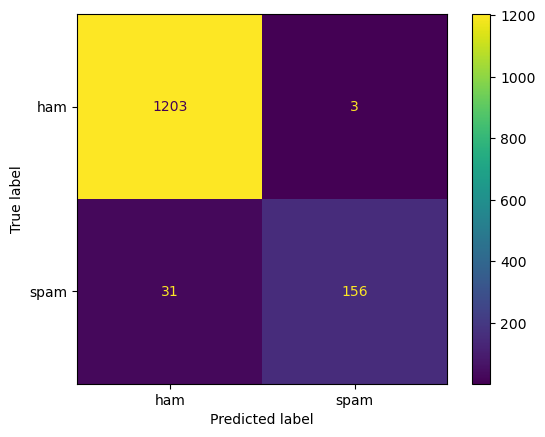

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [34]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1206
        spam       0.98      0.83      0.90       187

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.94      1393
weighted avg       0.98      0.98      0.97      1393



In [35]:
# sample.csv
# UpdatedResumeDataset.csv
# Sample_Resume.txt

In [36]:
sample = pd.read_csv('sample.csv', names=['text'], sep='\t')
sample

,text
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"Today is ""song dedicated day.."" Which song wil..."


In [37]:
x_vect = tfidf.transform(sample['text'])

In [38]:
y_pred = classifier.predict(x_vect)
y_pred

array(['ham', 'spam', 'ham'], dtype=object)

#### Save the model

In [39]:
import joblib

In [42]:
joblib.dump(classifier, 'model.bin')

['model.bin']

In [45]:
joblib.dump(tfidf, 'vectorizer.bin')

['vectorizer.bin']